# Tarea 2 - Inteligencia Artificial - Axel Chaves Reyes - 2021099588
## 1. Descarga y lectura del dataset
### Importar bibliotecas necesarias para el análisis


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


### Importando el dataset

In [7]:
dataset = "IRIS.csv"
iris_data = pd.read_csv(dataset)
print(iris_data.head()) # Para mostrar las primeras 5 filas del dataset

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


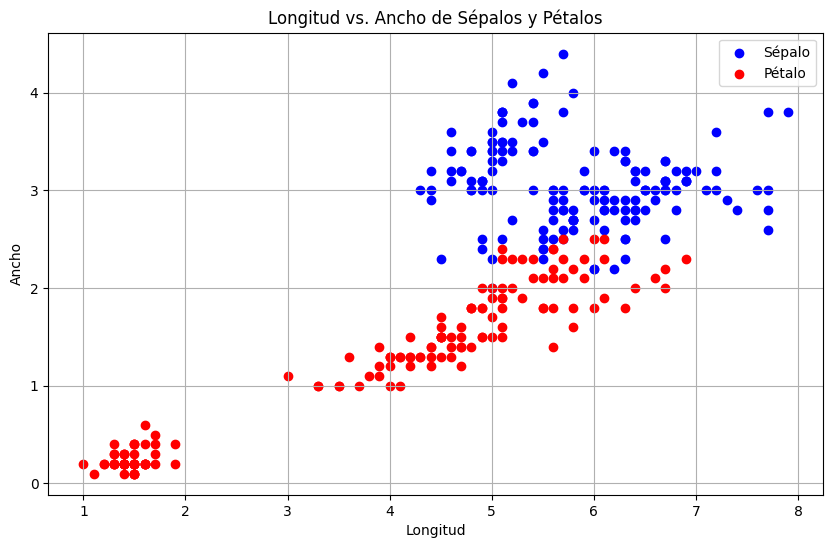

In [6]:
# Crear un gráfico de dispersión

plt.figure(figsize=(10, 6))
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c='blue', label='Sépalo')
plt.scatter(iris_data['petal_length'], iris_data['petal_width'], c='red', label='Pétalo')
plt.xlabel('Longitud')
plt.ylabel('Ancho')
plt.title('Longitud vs. Ancho de Sépalos y Pétalos')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

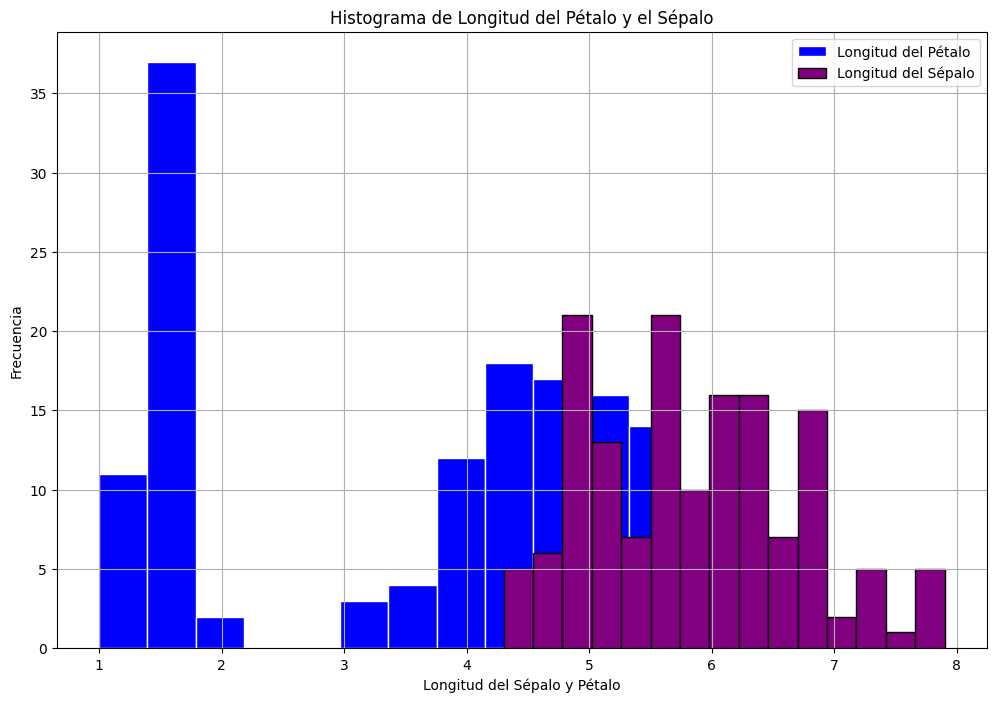

In [59]:
plt.figure(figsize=(12, 8))
plt.hist(iris_data['petal_length'], bins=15, color='blue', edgecolor='white', label='Longitud del Pétalo')
plt.hist(iris_data['sepal_length'], bins=15, color='purple', edgecolor='black', label='Longitud del Sépalo')
plt.xlabel('Longitud del Sépalo y Pétalo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud del Pétalo y el Sépalo')
plt.legend()
plt.grid(True)
plt.show()

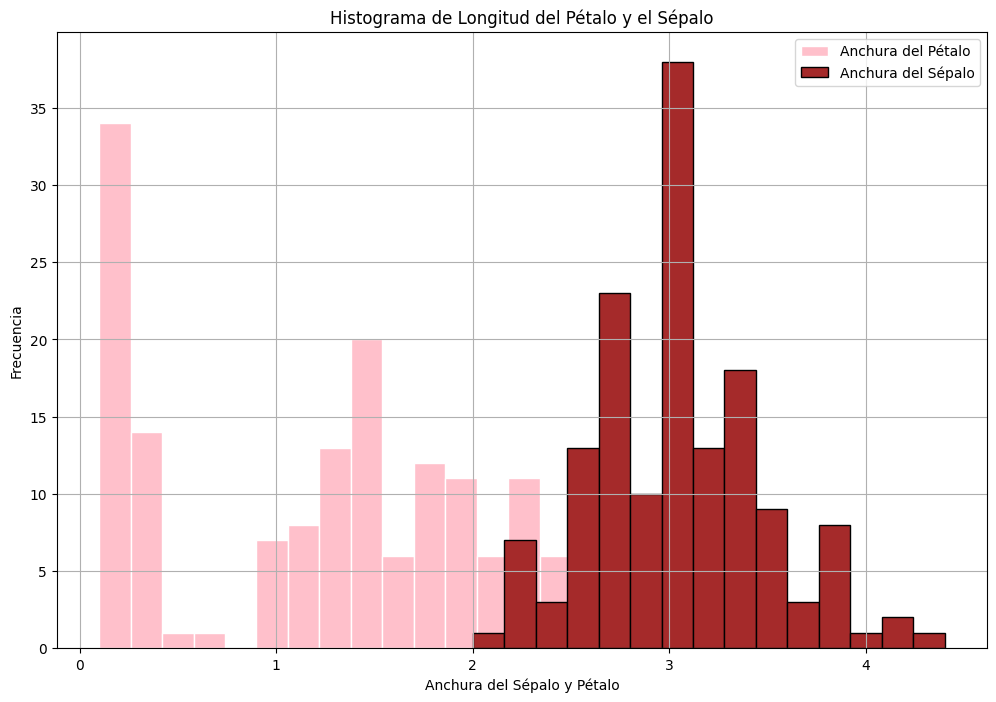

In [63]:
plt.figure(figsize=(12, 8))
plt.hist(iris_data['petal_width'], bins=15, color='pink', edgecolor='white', label='Anchura del Pétalo')
plt.hist(iris_data['sepal_width'], bins=15, color='brown', edgecolor='black', label='Anchura del Sépalo')
plt.xlabel('Anchura del Sépalo y Pétalo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud del Pétalo y el Sépalo')
plt.legend()
plt.grid(True)
plt.show()

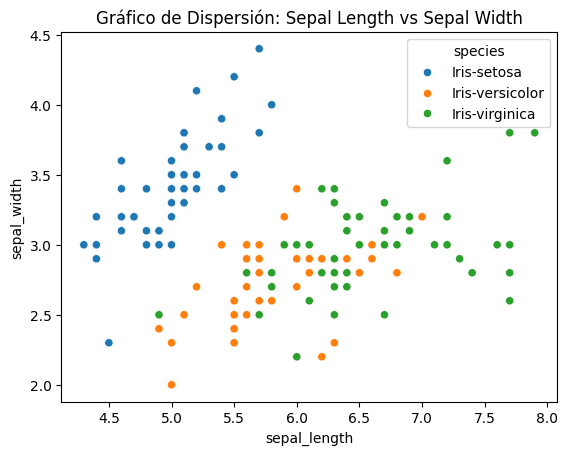

In [62]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_data)
plt.title('Gráfico de Dispersión: Sepal Length vs Sepal Width')
plt.show()

## 2. Implementación de KNN y experimentación de parámetros
### Algoritmo KNN y Distancia Euclídea

In [65]:


def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train] #calcular las distancias
    
        k_indices = np.argsort(distances)[:self.k] #obtener los indices de los k vecinos mas cercanos
        k_nearest_labels = [self.y_train[i] for i in k_indices] #obtener las etiquetas de los k vecinos mas cercanos
        most_common = Counter(k_nearest_labels).most_common() #obtener la etiqueta mas comun
        return most_common[0][0]

## 3. Evaluación del modelo con las métricas recomendadas
### Se implementa el 80/20 para el training y el testing

In [78]:
X = iris_data.drop("species", axis=1)  # Features
y = iris_data["species"]  # Labels 
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, shuffle=True)

### Se realizan pruebas con distintos valores de k

In [88]:
possible_k_values = range(1, 20)
kAccuracy = {}
for i in possible_k_values:
    knn = KNN(k=i)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"k: {i}, Precisión: {accuracy}")
    kAccuracy[i] = accuracy

k: 1, Precisión: 1.0
k: 2, Precisión: 1.0
k: 3, Precisión: 0.9666666666666667
k: 4, Precisión: 1.0
k: 5, Precisión: 0.9666666666666667
k: 6, Precisión: 1.0
k: 7, Precisión: 1.0
k: 8, Precisión: 1.0
k: 9, Precisión: 1.0
k: 10, Precisión: 1.0
k: 11, Precisión: 1.0
k: 12, Precisión: 1.0
k: 13, Precisión: 1.0
k: 14, Precisión: 1.0
k: 15, Precisión: 1.0
k: 16, Precisión: 1.0
k: 17, Precisión: 1.0
k: 18, Precisión: 1.0
k: 19, Precisión: 1.0


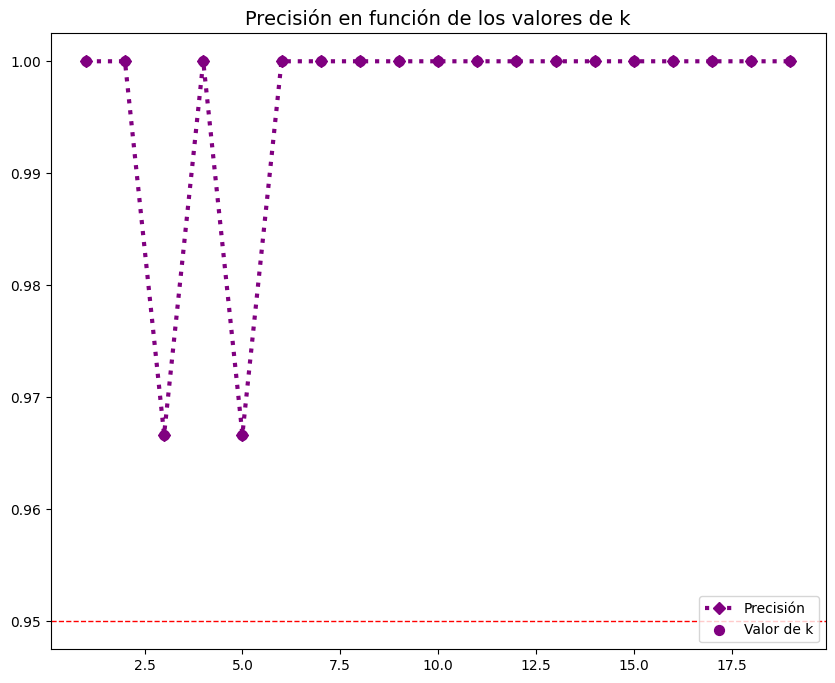

In [115]:
plt.figure(figsize=(10, 8))
plt.plot(kAccuracy.keys(), kAccuracy.values(), marker='D', linestyle=':', color='purple', linewidth=3, label='Precisión')
plt.scatter(kAccuracy.keys(), kAccuracy.values(), color='purple', s=50, label='Valor de k')
plt.title('Precisión en función de los valores de k', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(loc='lower right', fontsize=10)
plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1)
plt.show()